# Analysis notebook for the flash BSP

This block should just be run once.

In [ ]:
# Install numpy, pandas and matplotlib
! pip install numpy pandas matplotlib

Import the needed libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

---

Import the measurement data stored in the `data` folder.

In [2]:
file_path_standard = './data/take2/standard1.txt'
file_path_quad = './data/take2/quad1.txt'

with open(file_path_standard, 'r') as file:
    input_string_standard = file.read().strip()

with open(file_path_quad, 'r') as file:
    input_string_quad = file.read().strip()

As of now, in a single file there are both the read and write measurement of a specific benchmark setup. They are separated by commas and are in the following stucture: `Wxxx, Rxxx, Wxxx, Rxxx, ...` . In order to process and plot the results, we need to separate and clean the input.

In [7]:
# Function to split the values
def split_values(input_string):
    values = input_string.split(', ')
    write_values = [int(value[1:]) for value in values if value.startswith('W')]
    read_values = [int(value[1:]) for value in values if value.startswith('R')]
    return write_values, read_values

write_times_standard, read_times_standard = split_values(input_string_standard)
write_times_quad, read_times_quad = split_values(input_string_quad)
# write_times_standard_dma, read_times_standard_dma = split_values(input_string_standard_dma)
# write_times_quad_dma, read_times_quad_dma = split_values(input_string_quad_dma)

(1024, 1024, 1024, 1024)

In [10]:
# Create Panda dataframes

# Size of the test buffer used, in bytes
buffer_sizes = list(range(1, 1025, 1))

df_standard = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_standard, 'Write Time': write_times_standard})
df_quad = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_quad, 'Write Time': write_times_quad})
# df_standard_dma = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_standard_dma, 'Write Time': write_times_standard_dma})
# df_quad_dma = pd.DataFrame({'Buffer Test Size': buffer_sizes, 'Read Time': read_times_quad_dma, 'Write Time': write_times_quad_dma})

### Process the data

As the time is expected to increase with the number of bytes, it can be more difficult to understand the results. For this reason, instead of plotting the absolute values as gained from the measurement, the time per byte ratio is plotted.

In [11]:
# Obtain the time units / bytes ratio
df_standard['Read Ratio'] = df_standard['Read Time'] / df_standard['Buffer Test Size']
df_standard['Write Ratio'] = df_standard['Write Time'] / df_standard['Buffer Test Size']

df_quad['Read Ratio'] = df_quad['Read Time'] / df_quad['Buffer Test Size']
df_quad['Write Ratio'] = df_quad['Write Time'] / df_quad['Buffer Test Size']

# df_standard_dma['Read Ratio'] = df_standard_dma['Read Time'] / df_standard_dma['Buffer Test Size']
# df_standard_dma['Write Ratio'] = df_standard_dma['Write Time'] / df_standard_dma['Buffer Test Size']

# df_quad_dma['Read Ratio'] = df_quad_dma['Read Time'] / df_quad_dma['Buffer Test Size']
# df_quad_dma['Write Ratio'] = df_quad_dma['Write Time'] / df_quad_dma['Buffer Test Size']

### Plot the results

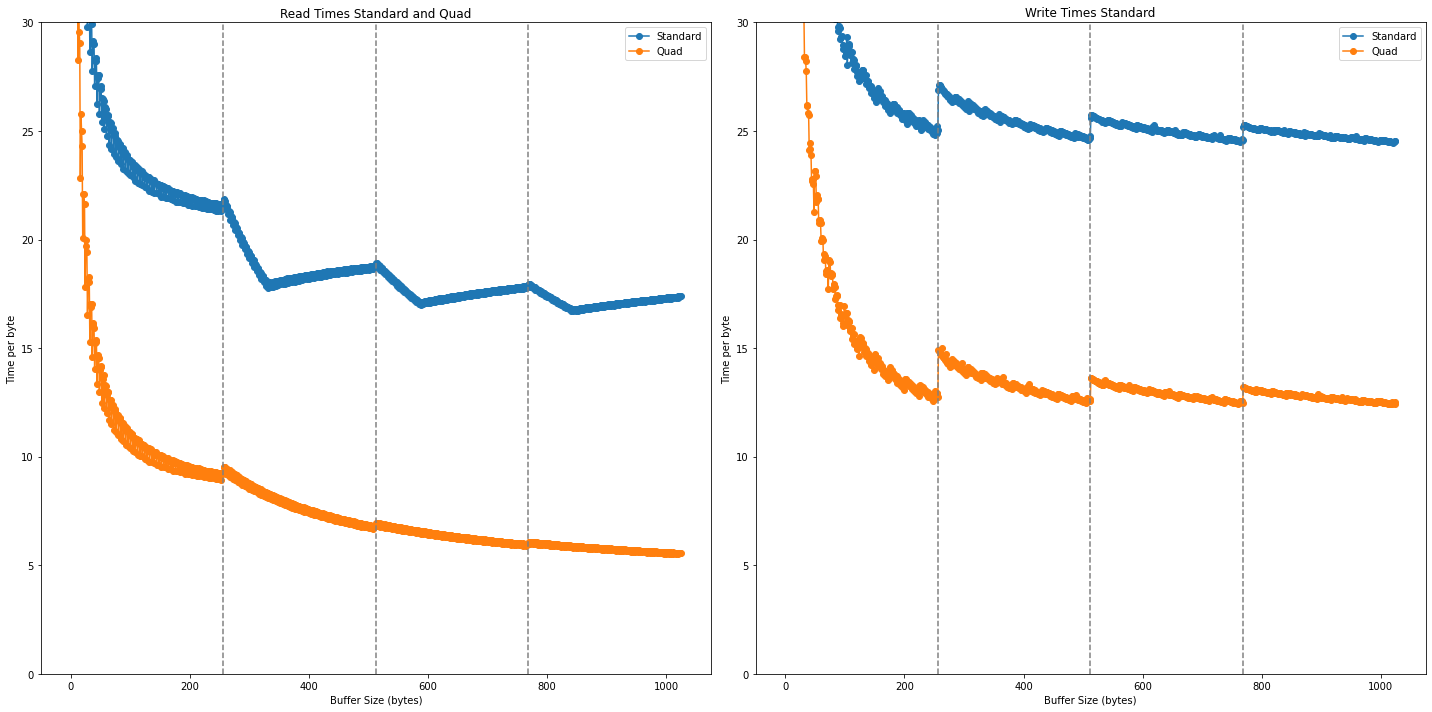

In [12]:
# Create plots
plt.figure(figsize=(20, 10))

# Plot for Read Times Standard
plt.subplot(1, 2, 1)
plt.plot(df_standard['Buffer Test Size'], df_standard['Read Ratio'], marker='o', label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Read Ratio'], marker='o', label='Quad')
plt.title('Read Times Standard and Quad')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time per byte')
plt.ylim(0, 30) # crop the y axis
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()


# Plot for Write Times Standard
plt.subplot(1, 2, 2)
plt.plot(df_standard['Buffer Test Size'], df_standard['Write Ratio'], marker='o', label='Standard')
plt.plot(df_quad['Buffer Test Size'], df_quad['Write Ratio'], marker='o', label='Quad')
plt.title('Write Times Standard')
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Time per byte')
plt.ylim(0, 30) # crop the y axis
plt.legend()

plt.axvline(x=256, color='grey', linestyle='--')
plt.axvline(x=512, color='grey', linestyle='--')
plt.axvline(x=768, color='grey', linestyle='--')
plt.tight_layout()

# Show the plots
plt.show()